# CIFAR10 Image Classification
# Irzan Fajari Nurahmadan

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import cv2
import os

import tensorflow  as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from google.colab import files
from keras.preprocessing import image
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator

# Import Dataset

In [ ]:
data = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

# Class Selection

In [ ]:
from sklearn.model_selection import train_test_split
# load dataset
(X_train, y_train), (X_test, y_test) = data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# Check shape
print(X.shape)

(60000, 32, 32, 3)


In [ ]:
subset_x = X[np.isin(y, [2,3,4]).flatten()]
subset_y = y[np.isin(y, [2,3,4]).flatten()]
#only using bird, cat, deer class

# Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(subset_x, subset_y, test_size=0.2, random_state=1234)

Train: X=(14400, 32, 32, 3), y=(14400, 1)
Test: X=(3600, 32, 32, 3), y=(3600, 1)


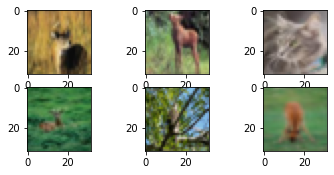

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(6):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

# LabelEncoder the class

In [ ]:
from sklearn.preprocessing import LabelEncoder
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Image Data Generator

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

datagen.fit(X_train)

# Make CNN Based Sequential Model

In [ ]:
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),
    layers.Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3,activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train The CNN Model using Callback

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max' , patience=5)
history = model.fit(datagen.flow(X_train, y_train, batch_size = 64), validation_data=(X_test, y_test), epochs=150, callbacks=callback)

Epoch 1/150
225/225 [==============================] - 8s 35ms/step - loss: 0.3361 - accuracy: 0.8922 - val_loss: 0.3820 - val_accuracy: 0.8775
Epoch 2/150
225/225 [==============================] - 8s 34ms/step - loss: 0.3334 - accuracy: 0.8879 - val_loss: 0.3821 - val_accuracy: 0.8792
Epoch 3/150
225/225 [==============================] - 8s 34ms/step - loss: 0.3311 - accuracy: 0.8898 - val_loss: 0.3824 - val_accuracy: 0.8764
Epoch 4/150
225/225 [==============================] - 7s 32ms/step - loss: 0.3382 - accuracy: 0.8907 - val_loss: 0.3641 - val_accuracy: 0.8844
Epoch 5/150
225/225 [==============================] - 7s 33ms/step - loss: 0.3317 - accuracy: 0.8901 - val_loss: 0.3754 - val_accuracy: 0.8833
Epoch 6/150
225/225 [==============================] - 7s 32ms/step - loss: 0.3314 - accuracy: 0.8919 - val_loss: 0.3881 - val_accuracy: 0.8739


# Saving the Model

In [ ]:
# Convert model to tflite.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp5y47dj0k/assets


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
with tf.io.gfile.GFile('/content/drive/My Drive/dataset/model.tflite', 'wb') as f:
  f.write(tflite_model)

# Plotting the model training history

In [ ]:
def graph(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

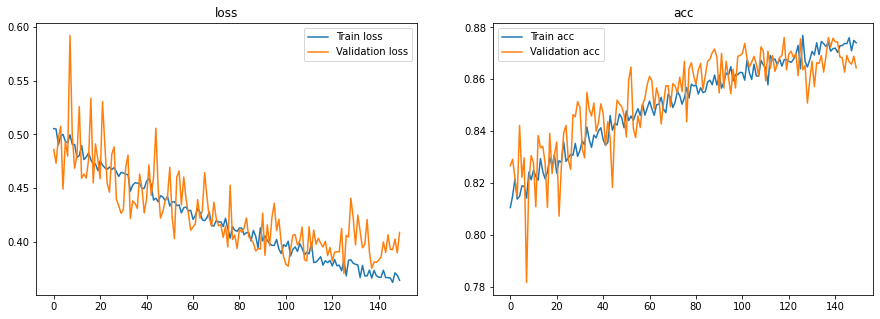

In [ ]:
graph(history)